In [2]:
!pip install pandas matplotlib seaborn scikit-learn surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357290 sha256=b9d01e851feeb1fc031c25806e9ac0c06bdca8090e10b81b6ef6daaac02b72d4
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from surprise import Dataset,Reader,SVD
from surprise.model_selection import cross_validate
from sklearn.metrics import mean_squared_error,r2_score






In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
Movies = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin1')


In [16]:
ratings = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin1')


In [20]:
data = pd.merge(Movies, ratings)

In [29]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


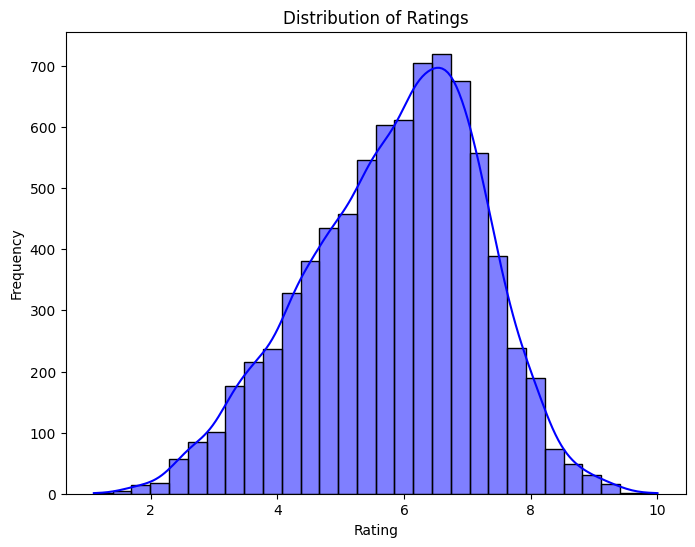

In [23]:
plt.figure(figsize=(8,6))
sns.histplot(data['Rating'],
bins=30, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15521 entries, 0 to 15520
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15521 non-null  object 
 1   Year      14991 non-null  object 
 2   Duration  7242 non-null   object 
 3   Genre     13642 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14994 non-null  object 
 7   Actor 1   13900 non-null  object 
 8   Actor 2   13131 non-null  object 
 9   Actor 3   12369 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [33]:
data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15516,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15517,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15518,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15519,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15520,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


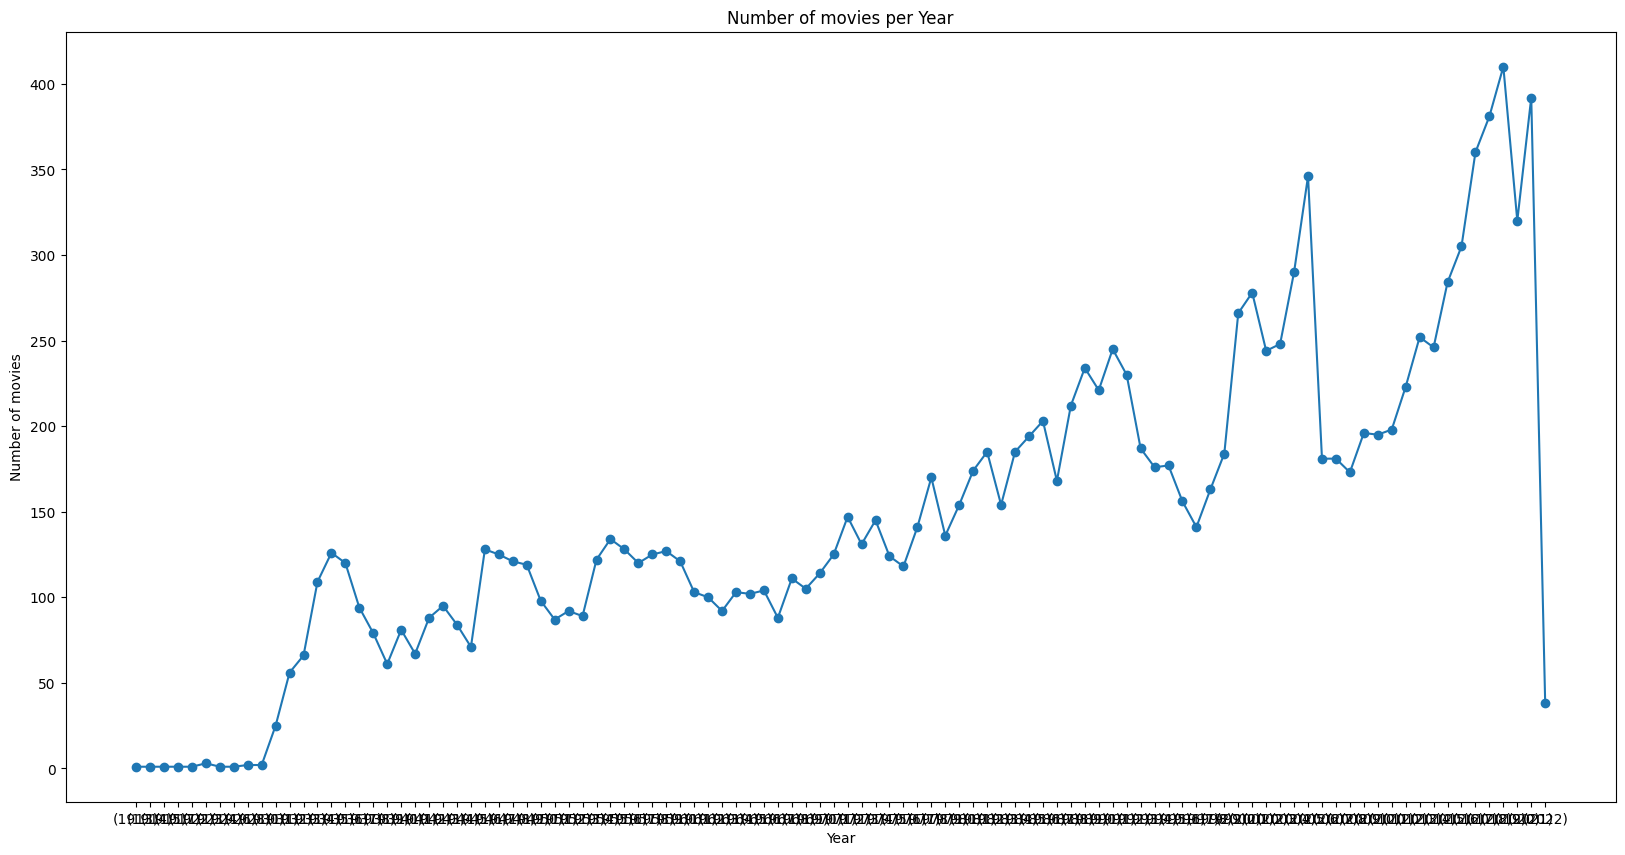

<function matplotlib.pyplot.close(fig=None)>

In [34]:
plt.figure(figsize=(20,10))
year_counts = Data['Year'].value_counts().sort_index()
years=year_counts.index

plt.plot(years,year_counts,marker='o')

plt.title('Number of movies per Year')
plt.xlabel('Year')
plt.ylabel('Number of movies')

plt.show()
plt.close


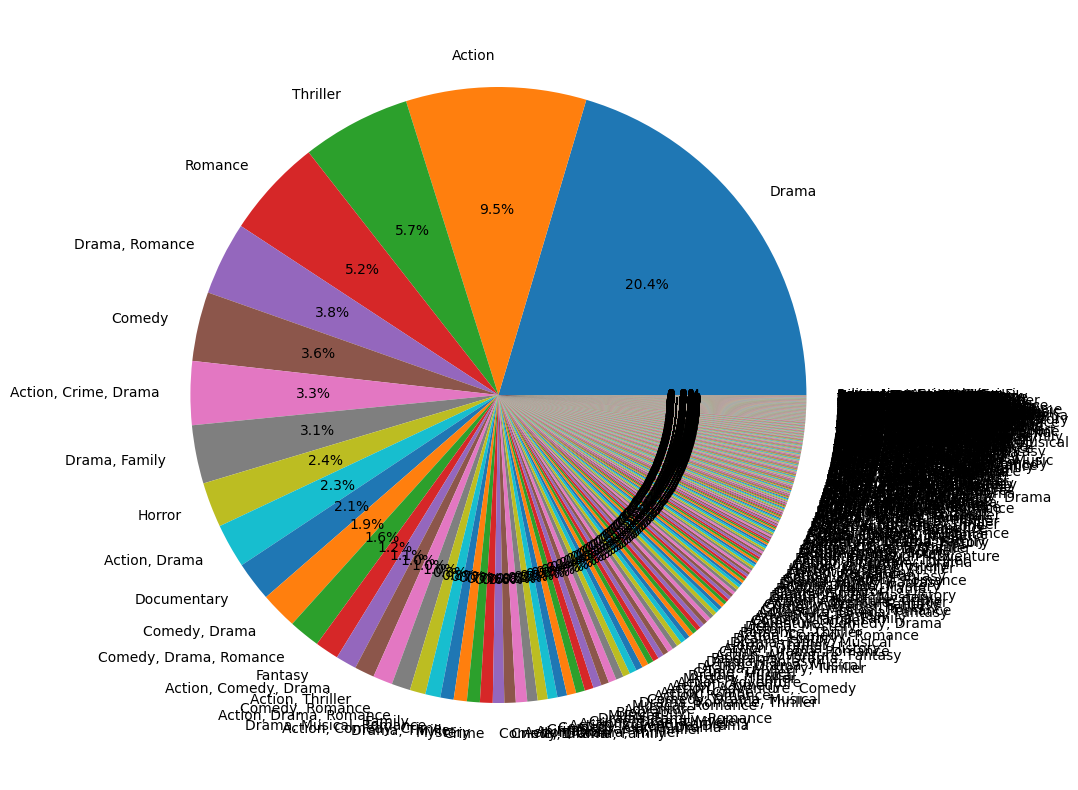

In [35]:
label=Data["Genre"].value_counts().index
sizes=Data["Genre"].value_counts()
plt.figure(figsize=(10,10))
plt.pie(sizes,labels=label,startangle=0,shadow=False,autopct='%1.1f%%')
plt.show()

In [38]:
ratings.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [43]:
Movies.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


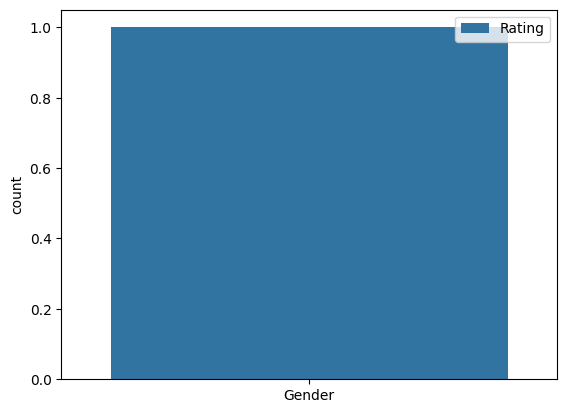

In [47]:
sns.countplot(x=['Gender'], hue=['Rating'])
plt.show()  # To display the plot


   userId  movieId  rating       movieName
0       1    15516     4.6   Zulam ko jala
1       2    15517     4.5           Zulmi
2       1    15518     7.8       Zulmi Raj
3       2    15519     8.2   Zulmi Shikari
4       3    15520     6.0  Zulmi-O-Sitham
RMSE: 0.5000


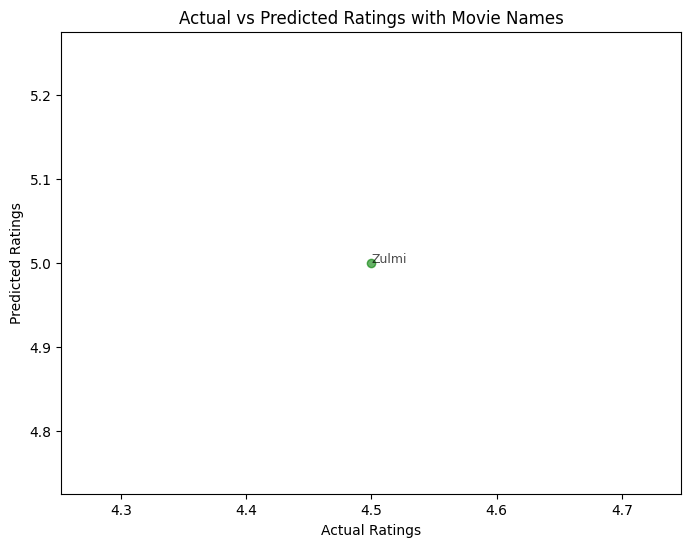

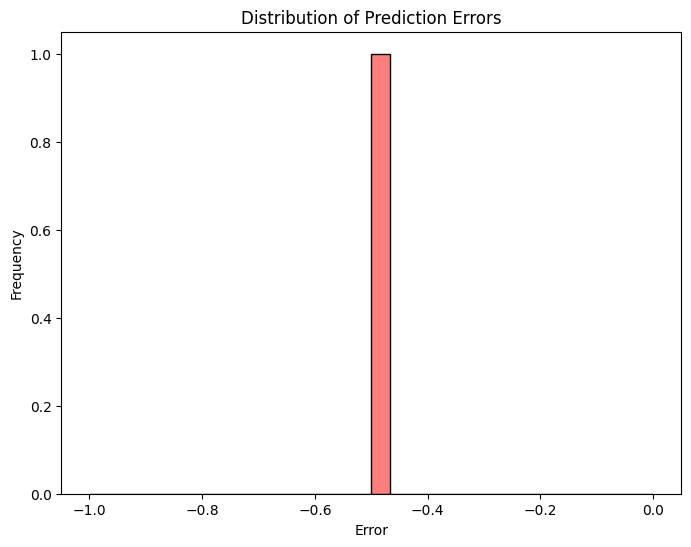

In [58]:

import pandas as pd
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

ratings = pd.DataFrame({
    'userId': [1, 2, 1, 2, 3],
    'movieId': [15516,15517,15518,15519,15520],
    'rating': [4.6,4.5,7.8, 8.2, 6.0],
    'movieName': ['Zulam ko jala', 'Zulmi', 'Zulmi Raj', 'Zulmi Shikari', 'Zulmi-O-Sitham']  # Added movieName column
})

print(ratings.head())

reader = Reader(rating_scale=(0.5, 5.0))
surprise_data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)


trainset, testset = train_test_split(surprise_data, test_size=0.2)

algo = SVD()

algo.fit(trainset)

predictions = algo.test(testset)

y_true = [pred.r_ui for pred in predictions]
y_pred = [pred.est for pred in predictions]

accuracy.rmse(predictions)

movie_id_to_name = dict(zip(ratings['movieId'], ratings['movieName']))

plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.6, color='green')

for i in range(len(y_true)):
    plt.annotate(movie_id_to_name[predictions[i].iid], (y_true[i], y_pred[i]), fontsize=9, alpha=0.7)

plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings with Movie Names')
plt.show()

errors = np.array(y_true) - np.array(y_pred)

plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=30, kde=True, color='red')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()
